# Домашнее задание к лекции "Статистика. Практика"

## Задание 1

Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/vgsales.csv).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?  
2) Критикам нравятся больше игры на PC или на PS4?  
3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:
- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

##### 1. Как критики относятся к спортивным играм?

Критикам нравятся спортивные игры?  
Критики, чаще ставят более высокие баллы спортивным играм?  

H0: Средняя оценка спортивных игр выше остальных >80%  
H1: Средняя оценка спортивных игр ниже 80%  

За alpha здесь и далее будем принимать 0.05  

Сравниваем значение по выборке с константой, поэтому нужен одновыборочный критерий.  

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r'E:\Pyda-20\stat_case_study\vgsales.csv')

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df[df.Genre == 'Sports'].groupby(by='Genre')['Critic_Score'].mean()

Genre
Sports    71.968174
Name: Critic_Score, dtype: float64

<AxesSubplot:xlabel='Genre'>

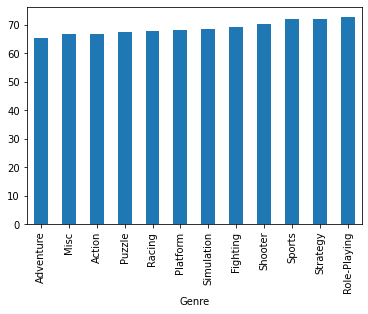

In [6]:
df.groupby(by='Genre')['Critic_Score'].mean().sort_values().plot(kind='bar')

In [7]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


H0: Средняя оценка спортивных игр выше остальных >80%  
H1: Средняя оценка спортивных игр ниже 80%

In [8]:
from scipy import stats as st
alpha = 0.05
result = st.ttest_1samp(df[df.Genre == 'Sports']['Critic_Score'].dropna(), 80, alternative='less')

print(df[df.Genre == 'Sports']['Critic_Score'].mean())
print(result)
if result.pvalue > alpha: 
    print('Отвергаем нулевую гипотезу, среднее больше 80.')
else:
    print('Не отвергаем нулевую нулевую гипотезу.')

71.96817420435511
Ttest_1sampResult(statistic=-19.99751475320892, pvalue=2.9649661125952924e-77)
Не отвергаем нулевую нулевую гипотезу.


H0 - Критики оценивают спортивные игры до 80%  
H1 - Критики оценивают спортивные игры более 80%

In [9]:
from scipy import stats as st
alpha = 0.05
result = st.ttest_1samp(df[df.Genre == 'Sports']['Critic_Score'].dropna(), 80, alternative='greater')

print(df[df.Genre == 'Sports']['Critic_Score'].mean())
print(result)
if result.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу, среднее больше 80.')
else:
    print('Не отвергаем нулевую нулевую гипотезу.')

71.96817420435511
Ttest_1sampResult(statistic=-19.99751475320892, pvalue=1.0)
Не отвергаем нулевую нулевую гипотезу.


#### 2. Критикам нравятся больше игры на PC или на PS4?

H0: Критикам нравятся больше игры на PC  
H1: Критикам нравятся больше игры на PS4

За alpha здесь и далее будем принимать 0.05

Сравниваем значение по выборке с константой, поэтому нужен одновыборочный критерий.

In [10]:
print(f"PS4 - {df[df.Platform == 'PS4']['Critic_Score'].mean()}, PC - {df[df.Platform == 'PC']['Critic_Score'].mean()}")

PS4 - 72.09126984126983, PC - 75.92867132867133


In [11]:
result = st.ttest_ind(df[df.Platform == 'PC']['Critic_Score'].dropna(), df[df.Platform == 'PS4']['Critic_Score'].dropna(), equal_var=False)
print(result)

if (result.pvalue > alpha):
    print('Отвергаем нулевую гипотезу, критикам нравятся игры на PS4')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=4.3087588262138725, pvalue=2.067249157283479e-05)
Не отвергаем нулевую гипотезу


#### 3. Критикам больше нравятся стрелялки или стратегии?

H0 - Критикам  нравятся стрелялки до 80  
H1 - Критикам  нравятся стрелялки более 80

In [12]:
result = st.ttest_1samp(df[df.Genre == 'Shooter']['Critic_Score'].dropna(), 80, alternative='greater')

print(df[df.Genre == 'Shooter']['Critic_Score'].mean())
print(result)
if result.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу, среднее больше 80.')
else:
    print('Не отвергаем нулевую нулевую гипотезу.')

70.18114406779661
Ttest_1sampResult(statistic=-20.730374525273128, pvalue=1.0)
Не отвергаем нулевую нулевую гипотезу.


H0 - Критикам  нравятся стратегии более  80  
H1 - Критикам  нравятся стрелялки менее 80

In [13]:
result = st.ttest_1samp(df[df.Genre == 'Strategy']['Critic_Score'].dropna(), 80, alternative='less')

print(df[df.Genre == 'Strategy']['Critic_Score'].mean())
print(result)
if result.pvalue > alpha: 
    print('Отвергаем нулевую гипотезу, среднее меньше 80.')
else:
    print('Не отвергаем нулевую нулевую гипотезу.')

72.08609271523179
Ttest_1sampResult(statistic=-11.626946126343032, pvalue=2.323715829142146e-26)
Не отвергаем нулевую нулевую гипотезу.


H0 - Критикам больше нравятся стратегии  
H1 - Критикам нравятся Шутеры  
Двухфакторный тест

In [14]:
result = st.ttest_ind(df[df.Genre == 'Strategy']['Critic_Score'].dropna(), df[df.Genre == 'Shooter']['Critic_Score'].dropna(), equal_var=False)
print(result)

if (result.pvalue > alpha):
    print('Отвергаем нулевую гипотезу, критикам нравятся игры на PS4')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=2.2972408230640315, pvalue=0.021938989522304823)
Не отвергаем нулевую гипотезу


## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;  
2) Удалите мусорные символы;  
3) Удалите стоп-слова;  
4) Привидите все слова к нормальной форме;  
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  
```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```
Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);  

6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);    

7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных;    

8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix);    

9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [22]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ingvar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ingvar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
spam = pd.read_csv('spam.csv')

In [17]:
#Функции для обработки и подготовки датафрейма
#Приведение к единому регистру
def lower(col):
    return col.lower()

#Удаление спец символов
def del_sym(col):
    return re.sub('[\W_]+',' ', col)
#Удаление стоп слов и "мусора" оставшегося после удаления стоп слов
#все слова менее 2х символов не входя в итоговый список
def del_stop(col):
    stopwords_set = set(stopwords.words('english'))
    texts_splitted = col.split()
    #print('WITH STOP: ', texts_splitted)
    without_sw = [word for word in texts_splitted if word not in stopwords_set]
    b = []
    for i in without_sw:
        if len(i)>2:
            b.append(i)
    #print('NO STOP: ', without_sw)
    return b

#Приведение к нормальной формы слов в датафрейме
def lemma_word(col):
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized_text = [wordnet_lemmatizer.lemmatize(word) for word in col]
    #print(lemmatized_text)
    return lemmatized_text


In [18]:
spam.Message = spam.Message.apply(lower)

In [19]:
spam.Message = spam.Message.apply(del_sym)

In [23]:
spam.Message = spam.Message.apply(del_stop)

In [24]:
spam.Message = spam.Message.apply(lemma_word)

In [25]:
spam

,Category,Message
0,ham,"[jurong, point, crazy, available, bugis, great..."
1,ham,"[lar, joking, wif, oni]"
2,spam,"[free, entry, wkly, comp, win, cup, final, tkt..."
3,ham,"[dun, say, early, hor, already, say]"
4,ham,"[nah, think, go, usf, life, around, though]"
...,...,...
5567,spam,"[2nd, time, tried, contact, 750, pound, prize,..."
5568,ham,"[going, esplanade, home]"
5569,ham,"[pity, mood, suggestion]"
5570,ham,"[guy, bitching, acted, like, interested, buyin..."


In [26]:
def list_to_string(col):
    s = ''
    for n,i in enumerate(col):
        s += i
        if n>=0 and n<len(col)-1:
            s+= ' '
    #print(s)
    return s

In [27]:
spam.Message = spam.Message.apply(list_to_string)

In [28]:
spam

,Category,Message
0,ham,jurong point crazy available bugis great world...
1,ham,lar joking wif oni
2,spam,free entry wkly comp win cup final tkts 21st m...
3,ham,dun say early hor already say
4,ham,nah think go usf life around though
...,...,...
5567,spam,2nd time tried contact 750 pound prize claim e...
5568,ham,going esplanade home
5569,ham,pity mood suggestion
5570,ham,guy bitching acted like interested buying some...


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(spam.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

In [30]:
tfidf_matrix

,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,0207,02072069400,...,zed,zero,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
tfidf_matrix.describe()

,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,0207,02072069400,...,zed,zero,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,〨ud
count,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,...,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.001308,0.000047,0.000104,0.000047,0.000064,0.000068,0.000091,0.000105,0.000185,0.000057,...,0.000227,0.000077,0.000060,0.000071,0.000116,0.000076,0.000060,0.000053,0.000035,0.000063
std,0.020293,0.003528,0.005500,0.003527,0.004777,0.005049,0.004810,0.007835,0.008329,0.004275,...,0.006947,0.005717,0.004458,0.005278,0.006149,0.005654,0.004462,0.003940,0.002639,0.004723
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.714807,0.263370,0.296947,0.263265,0.356588,0.376903,0.253902,0.584871,0.488440,0.319143,...,0.241461,0.426730,0.332803,0.393955,0.335862,0.422071,0.333061,0.294134,0.196977,0.352569


In [66]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, spam.Category, test_size=0.3,random_state=42)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [69]:
model.coef_

array([[ 1.29493809, -0.0147589 ,  0.16048969, ...,  0.21877564,
        -0.01356239,  0.        ]])

In [70]:
#Матрица прогноза и факта по тестовой выборке
y_pred = model.predict(X_test)
res_df = X_test.copy()
res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,0207,02072069400,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,〨ud,y_pred,y_test
3245,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham,ham
944,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham,ham
1044,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham,ham
2484,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham,ham
812,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham,ham
2525,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spam,spam
4975,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham,ham
650,0.566635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spam,spam


In [71]:
model.score(X_test, y_test)

0.9539473684210527

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model.predict(X_test))

0.9539473684210527

In [43]:
from sklearn.metrics import confusion_matrix

In [72]:
cnf_matrix  = confusion_matrix(y_test,model.predict(X_test))

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

In [73]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1444    4]
 [  73  151]]


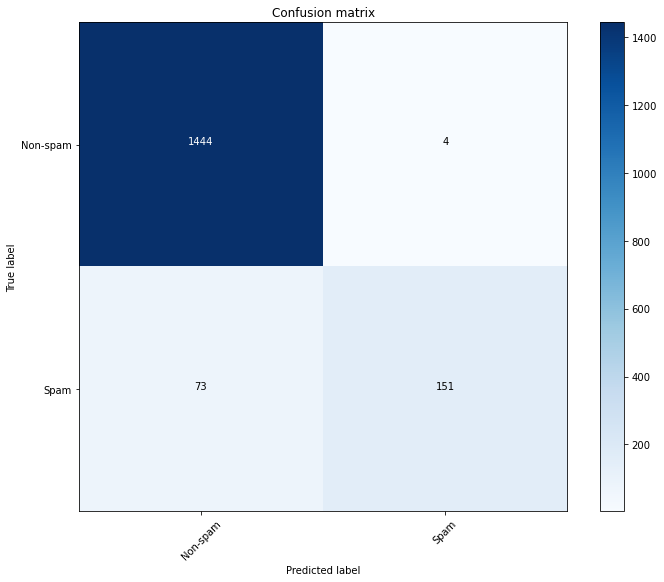

In [78]:
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-spam', 'Spam'],
                      title='Confusion matrix')
plt.show()

#### Результаты по Confusion matrix
1444  - случая истинно ложных сообщений, т.е. сообщений не спама.
151   - случая истинно истинных сообщений, т.е. являющихся спамом
73    - случая когда модель "спрогнозировала" на спам сообщениях, определив их как не спам
4     - случая когда модель "спрогнозиорвала" на не спам сообщения , опредилив их как спам

Если например мы будем предсказывать сообщения как не спам, точность у нас вырастет.
С текущей 95,4% при определении точности только по не спам сообщениям у нас станет 99,7%.
Но модели как таковой не будет, мы ведь хотим определять спам сообщения.

In [80]:
#Расчет общей точности по матрице (аналог accuracy_score)
print( (cnf_matrix[0][0]+cnf_matrix[1][1])/cnf_matrix.sum())

0.9539473684210527


In [83]:
#Расчет точности предсказания сообщений при предсказании их как не спам
print( (cnf_matrix[0][0])/(cnf_matrix[0][0]+cnf_matrix[0][1]))

0.9972375690607734


In [87]:
err_predict_df = spam.join(res_df,how='left')

In [95]:
#Выводим по заданию 7 итоговую матрицу с сообщениями и векторами где прогноз не совпал с фактом.
err_predict_df.dropna(inplace=True)
err_predict_df[err_predict_df.y_pred!=err_predict_df.y_test]


,Category,Message,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,〨ud,y_pred,y_test
15,spam,xxxmobilemovieclub use credit click wap link n...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham,spam
19,spam,england macedonia dont miss goal team news txt...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham,spam
68,spam,hear new divorce barbie come ken stuff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham,spam
95,spam,free ringtone waiting collected simply text pa...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham,spam
135,spam,want get laid tonight want real dogging locati...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham,spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,spam,believe true incredible txts reply learn truly...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham,spam
5120,spam,private 2003 account statement 078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham,spam
5366,spam,400 xmas reward waiting computer randomly pick...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham,spam
5377,spam,current leading bid 151 pause auction send cus...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham,spam
